   # INDENG 242 Midterm Ankit Nitinkumar Bhawsar 3038588568


### Import Necessary Libraries


In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
import statsmodels.formula.api as smf

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


from sklearn.ensemble import RandomForestRegressor

import time

### Import Training and Testing Yelp Datasets

I also printed some information and the head of the training data set.

In [108]:
path = os.getcwd() + "/yelp242_train.csv"
yelp_train = pd.read_csv(path)
path = os.getcwd() + "/yelp242_test.csv"
yelp_test = pd.read_csv(path)

yelp_train.info()

yelp_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6272 entries, 0 to 6271
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   stars                       6272 non-null   float64
 1   review_count                6272 non-null   int64  
 2   GoodForKids                 6272 non-null   object 
 3   Alcohol                     6272 non-null   object 
 4   BusinessAcceptsCreditCards  6272 non-null   object 
 5   WiFi                        6272 non-null   object 
 6   BikeParking                 6272 non-null   object 
 7   ByAppointmentOnly           6272 non-null   object 
 8   WheelechairAccessible       6272 non-null   object 
 9   OutdoorSeating              6272 non-null   object 
 10  RestaurantsReservations     6272 non-null   object 
 11  DogsAllowed                 6272 non-null   object 
 12  Caters                      6272 non-null   object 
dtypes: float64(1), int64(1), object(1

,stars,review_count,GoodForKids,Alcohol,BusinessAcceptsCreditCards,WiFi,BikeParking,ByAppointmentOnly,WheelechairAccessible,OutdoorSeating,RestaurantsReservations,DogsAllowed,Caters
0,4.5,153,FALSE,'beer_and_wine',TRUE,'free',FALSE,(Missing),(Missing),FALSE,TRUE,FALSE,FALSE
1,3.5,19,TRUE,(Missing),TRUE,'free',(Missing),(Missing),(Missing),(Missing),FALSE,(Missing),(Missing)
2,4.5,3,TRUE,'full_bar',TRUE,(Missing),(Missing),(Missing),(Missing),TRUE,(Missing),(Missing),(Missing)
3,4.0,775,TRUE,'none',TRUE,'free',TRUE,FALSE,(Missing),TRUE,TRUE,(Missing),TRUE
4,3.5,24,TRUE,'full_bar',TRUE,'free',(Missing),(Missing),(Missing),FALSE,TRUE,(Missing),(Missing)


#### The Training and Testing dataset sizes can be printed as:


In [109]:
yelp_train.shape, yelp_test.shape

((6272, 13), (2688, 13))

---

### Q3) 1) (a)

The modeling technique described to handle missing values is not very reasonable. Adding missing variables as categorical variables basically misleades the model into thinking absent/missing values have significance and hence model assigns them weightage.

There are usually 3 reasonable ways to handle missing values:
1. Delete obsevations with missing values if your dataset is large enough.
2. Replace missing values with mode of the feature over all other observations.
3. Create another model for predicting missing values.

---


# Linear Regression


Now, I have built a R-style coding format statsmodel.

For each of the categorical variables, I have used (Missing) as the reference level to be incorporated into the intercept term.

In [5]:
linreg_model = smf.ols(formula='stars ~ review_count '
                +'+ C(GoodForKids, Treatment(reference=\'(Missing)\'))'
                +'+ C(Alcohol, Treatment(reference=\'(Missing)\'))'
                +'+ C(BusinessAcceptsCreditCards, Treatment(reference=\'(Missing)\'))'
                +'+ C(WiFi, Treatment(reference=\'(Missing)\'))'
                +'+ C(BikeParking, Treatment(reference=\'(Missing)\'))'
                +'+ C(ByAppointmentOnly, Treatment(reference=\'(Missing)\'))'
                +'+ C(WheelechairAccessible, Treatment(reference=\'(Missing)\'))'
                +'+ C(OutdoorSeating, Treatment(reference=\'(Missing)\'))'
                +'+ C(RestaurantsReservations, Treatment(reference=\'(Missing)\'))'
                +'+ C(DogsAllowed, Treatment(reference=\'(Missing)\'))'
                +'+ C(Caters, Treatment(reference=\'(Missing)\'))'
                ,data=yelp_train).fit()

print(linreg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  stars   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     52.33
Date:                Wed, 19 Oct 2022   Prob (F-statistic):          2.45e-235
Time:                        22:26:51   Log-Likelihood:                -7220.7
No. Observations:                6272   AIC:                         1.449e+04
Df Residuals:                    6246   BIC:                         1.467e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

**As we can observe, all the 'missing' categorical variables are incorporated into the intercept and what remains are the other values of categories. Ex: TRUE/FALSE, free/no/paid**

# Regression Tree

Now, I have built a regression tree to fit the training data.
First I print some info on the training data to observe categorical values.

In [110]:
yelp_train.info()
yelp_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6272 entries, 0 to 6271
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   stars                       6272 non-null   float64
 1   review_count                6272 non-null   int64  
 2   GoodForKids                 6272 non-null   object 
 3   Alcohol                     6272 non-null   object 
 4   BusinessAcceptsCreditCards  6272 non-null   object 
 5   WiFi                        6272 non-null   object 
 6   BikeParking                 6272 non-null   object 
 7   ByAppointmentOnly           6272 non-null   object 
 8   WheelechairAccessible       6272 non-null   object 
 9   OutdoorSeating              6272 non-null   object 
 10  RestaurantsReservations     6272 non-null   object 
 11  DogsAllowed                 6272 non-null   object 
 12  Caters                      6272 non-null   object 
dtypes: float64(1), int64(1), object(1

,stars,review_count,GoodForKids,Alcohol,BusinessAcceptsCreditCards,WiFi,BikeParking,ByAppointmentOnly,WheelechairAccessible,OutdoorSeating,RestaurantsReservations,DogsAllowed,Caters
0,4.5,153,FALSE,'beer_and_wine',TRUE,'free',FALSE,(Missing),(Missing),FALSE,TRUE,FALSE,FALSE
1,3.5,19,TRUE,(Missing),TRUE,'free',(Missing),(Missing),(Missing),(Missing),FALSE,(Missing),(Missing)
2,4.5,3,TRUE,'full_bar',TRUE,(Missing),(Missing),(Missing),(Missing),TRUE,(Missing),(Missing),(Missing)
3,4.0,775,TRUE,'none',TRUE,'free',TRUE,FALSE,(Missing),TRUE,TRUE,(Missing),TRUE
4,3.5,24,TRUE,'full_bar',TRUE,'free',(Missing),(Missing),(Missing),FALSE,TRUE,(Missing),(Missing)


**Similarly, this time I have used the get_dummies() function to convert the categorical variables into binary features.
The columns in col list are set to drop the first value i.e. Missing. But since WiFi and Alcohol and more that 2 valid values, I need to manually remove them from the model.**

In [112]:

col = ['GoodForKids',
        'BusinessAcceptsCreditCards', 'BikeParking',
        'ByAppointmentOnly', 'WheelechairAccessible', 'OutdoorSeating',
        'RestaurantsReservations', 'DogsAllowed', 'Caters']
enc1 = pd.get_dummies(yelp_train, columns = col, drop_first=True)

enc2 = pd.get_dummies(enc1, columns = ['WiFi'])
enc3 = pd.get_dummies(enc2, columns = ['Alcohol'])
train_enc = enc3.drop(columns= ['Alcohol_(Missing)','WiFi_(Missing)'])

# train_enc.info()
# train_enc.head()

enc1 = pd.get_dummies(yelp_test, columns = col, drop_first=True)

enc2 = pd.get_dummies(enc1, columns = ['WiFi'])
enc3 = pd.get_dummies(enc2, columns = ['Alcohol'])
test_enc = enc3.drop(columns= ['Alcohol_(Missing)','WiFi_(Missing)'])

test_enc.info()
test_enc.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2688 entries, 0 to 2687
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   stars                             2688 non-null   float64
 1   review_count                      2688 non-null   int64  
 2   GoodForKids_FALSE                 2688 non-null   uint8  
 3   GoodForKids_TRUE                  2688 non-null   uint8  
 4   BusinessAcceptsCreditCards_FALSE  2688 non-null   uint8  
 5   BusinessAcceptsCreditCards_TRUE   2688 non-null   uint8  
 6   BikeParking_FALSE                 2688 non-null   uint8  
 7   BikeParking_TRUE                  2688 non-null   uint8  
 8   ByAppointmentOnly_FALSE           2688 non-null   uint8  
 9   ByAppointmentOnly_TRUE            2688 non-null   uint8  
 10  WheelechairAccessible_FALSE       2688 non-null   uint8  
 11  WheelechairAccessible_TRUE        2688 non-null   uint8  
 12  Outdoo

,stars,review_count,GoodForKids_FALSE,GoodForKids_TRUE,BusinessAcceptsCreditCards_FALSE,BusinessAcceptsCreditCards_TRUE,BikeParking_FALSE,BikeParking_TRUE,ByAppointmentOnly_FALSE,ByAppointmentOnly_TRUE,...,DogsAllowed_FALSE,DogsAllowed_TRUE,Caters_FALSE,Caters_TRUE,WiFi_'free',WiFi_'no',WiFi_'paid',Alcohol_'beer_and_wine',Alcohol_'full_bar',Alcohol_'none'
0,4.0,34,0,0,0,1,0,1,0,0,...,1,0,0,1,1,0,0,0,1,0
1,4.0,802,0,1,0,1,1,0,0,0,...,1,0,0,1,1,0,0,0,0,0
2,4.0,231,0,1,0,1,1,0,1,0,...,1,0,0,1,1,0,0,0,1,0
3,2.0,27,0,1,0,1,0,1,0,0,...,1,0,0,1,1,0,0,0,0,1
4,3.5,6,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


**Separate the columns for X and y in both the Train and Test set**

In [114]:
y_dtr_train = train_enc['stars']
X_dtr_train = train_enc.drop(['stars'], axis=1)

y_dtr_test = test_enc['stars']
X_dtr_test = test_enc.drop(['stars'], axis=1)

print(y_dtr_train.shape)
print(X_dtr_train.shape)
print(y_dtr_test.shape)
print(X_dtr_test.shape)

(6272,)
(6272, 25)
(2688,)
(2688, 25)


**Now, we have to perform 5-fold cross validation to find optimal value for complexity parameter, ccp_alpha**

**Linespace is used to create a list of possible ccp_alpha values we want to test**

**DecisionTreeRegressor is initialized with minimum samples per leaf=5, minimum samples per split=20 and random state as 10.**

**GridSearchCV is used to run cross validation on the list of ccp values we created.**

**Model is then fit on the training data.**

In [9]:
grid_values = {'ccp_alpha': np.linspace(0, 0.002, 50)}

dtr = DecisionTreeRegressor(min_samples_leaf=5, 
                            min_samples_split=20, 
                            random_state=10)

dtr_cv = GridSearchCV(dtr, param_grid=grid_values, scoring='r2', cv=5, verbose=1)

dtr_cv.fit(X_dtr_train, y_dtr_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(min_samples_leaf=5,
                                             min_samples_split=20,
                                             random_state=10),
             param_grid={'ccp_alpha': array([0.00000000e+00, 4.08163265e-05, 8.16326531e-05, 1.22448980e-04,
       1.63265306e-04, 2.04081633e-04, 2.44897959e-04, 2.85714286e-04,
       3.26530612e-04, 3.67346939e-04, 4.08163265e-04, 4.48979592e-04,
       4.89795918e-04, 5.30612245e-04, 5....
       1.14285714e-03, 1.18367347e-03, 1.22448980e-03, 1.26530612e-03,
       1.30612245e-03, 1.34693878e-03, 1.38775510e-03, 1.42857143e-03,
       1.46938776e-03, 1.51020408e-03, 1.55102041e-03, 1.59183673e-03,
       1.63265306e-03, 1.67346939e-03, 1.71428571e-03, 1.75510204e-03,
       1.79591837e-03, 1.83673469e-03, 1.87755102e-03, 1.91836735e-03,
       1.95918367e-03, 2.00000000e-03])},
             scoring='r2', verbose=1)

**Now that we have run cross validation, we can print the graph of ccp_alpha vs R^2 obtained during cross validation**



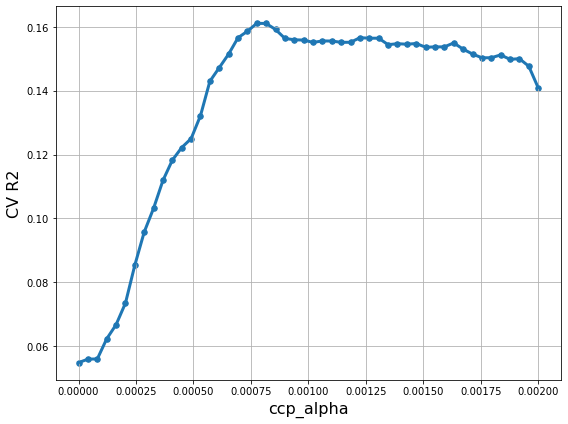

In [10]:
ccp_alpha = dtr_cv.cv_results_['param_ccp_alpha'].data
R2_scores = dtr_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)**Now, we have to perform 5-fold cross validation to find optimal value for complexity parameter, ccp_alpha**

**Linespace is used to create a list of possible ccp_alpha values we want to test**

**DecisionTreeRegressor is initialized with minimum samples per leaf=5, minimum samples per split=20 and random state as 10.**

**GridSearchCV is used to run cross validation on the list of ccp values we created.**

**Model is then fit on the training data.**
plt.ylabel('CV R2', fontsize=16)
plt.scatter(ccp_alpha, R2_scores, s=30)
plt.plot(ccp_alpha, R2_scores, linewidth=3)
plt.grid(True, which='both')
# plt.xlim([0, 0.00055])
# plt.ylim([0.2, 0.5])

plt.tight_layout()
plt.show()

**The best ccp_alpha can be printed simply by calling the object**



In [115]:
dtr_cv.best_params_

{'ccp_alpha': 0.0007755102040816326}

# Comparison

To compare the performance of Decision Tree and Linear Regression, we first need to write some functions for out-of-sample-r2 and mean absolute error.

In [116]:
def OSR2_linreg(model, df_train, df_test, dependent_var):   
    
    y_test = df_test[dependent_var]
    y_pred = model.predict(df_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(df_train[dependent_var]))**2)    
    
    return 1 - SSE/SST

def OSR2_dtree(predictions, y_test,y_train):
    SSE = np.sum((y_test-predictions)**2)
    SST = np.sum((y_test-np.mean(y_train))**2)
    r2 = 1-SSE/SST
    return r2
    
def mean_absolute_error(predictions, y_test,y_train):
    MAE = np.mean(np.abs(y_test-predictions))
    return MAE


### Linear Regression Performance

Here, I have used the yelp testing set to find the OSR^2 values and MAE values using the linear regression model, which are then printed

In [118]:

y_lin_pred = linreg_model.predict(yelp_test)

linreg_osr2 = OSR2_linreg(linreg_model, yelp_train, yelp_test, 'stars')
linreg_MAE = mean_absolute_error(y_lin_pred,y_dtr_test,y_dtr_train)

print("Linear Regression Out-of-sample-R^2: ",linreg_osr2)
print("Linear Regression Mean Absolute Error: ",linreg_MAE)
print()
# Comparison

Linear Regression Out-of-sample-R^2:  0.1526855652634137
Linear Regression Mean Absolute Error:  0.639768163472887



### Regression Tree Performance

Similarly, I have used the yelp testing set to find the OSR^2 values and MAE values using the decision tree model, which are then printed

In [120]:
y_dtr_pred = dtr_cv.predict(X_dtr_test)
dtr_osr2 = OSR2_dtree(y_dtr_pred,y_dtr_test,y_dtr_train)
dtr_MAE = mean_absolute_error(y_dtr_pred,y_dtr_test,y_dtr_train)

print("Regression Tree Out-of-sample-R^2: ",dtr_osr2)
print("Regression Tree Mean Absolute Error: ",dtr_MAE)

Regression Tree Out-of-sample-R^2:  0.19042343212080692
Regression Tree Mean Absolute Error:  0.6201992709855447


---

### Q3) 1) (b) (iii)

**As we can observe from the out-of-sample-r2 and Mean absolute error values of both the decision tree and linear regression models, the Regression tree has better performance.**

**Its higher OSR^2 values means it fits the training data better than linear regressor model.**

**Its Lower Mean Absolute Error also indicates the same.**

---


# Random Forest

For random forest, as instructed in the question, we have to one-hot encode the categorical variables and have seperate 'Missing' category.

In [121]:

col = ['GoodForKids',
        'BusinessAcceptsCreditCards', 'BikeParking',
        'ByAppointmentOnly', 'WheelechairAccessible', 'OutdoorSeating',
        'RestaurantsReservations', 'DogsAllowed', 'Caters','WiFi','Alcohol']

train_enc = pd.get_dummies(yelp_train, columns = col)

# train_enc.info()
# train_enc.head()

test_enc = pd.get_dummies(yelp_test, columns = col)

test_enc.info()
test_enc.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2688 entries, 0 to 2687
Data columns (total 37 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   stars                                 2688 non-null   float64
 1   review_count                          2688 non-null   int64  
 2   GoodForKids_(Missing)                 2688 non-null   uint8  
 3   GoodForKids_FALSE                     2688 non-null   uint8  
 4   GoodForKids_TRUE                      2688 non-null   uint8  
 5   BusinessAcceptsCreditCards_(Missing)  2688 non-null   uint8  
 6   BusinessAcceptsCreditCards_FALSE      2688 non-null   uint8  
 7   BusinessAcceptsCreditCards_TRUE       2688 non-null   uint8  
 8   BikeParking_(Missing)                 2688 non-null   uint8  
 9   BikeParking_FALSE                     2688 non-null   uint8  
 10  BikeParking_TRUE                      2688 non-null   uint8  
 11  ByAppointmentOnly

,stars,review_count,GoodForKids_(Missing),GoodForKids_FALSE,GoodForKids_TRUE,BusinessAcceptsCreditCards_(Missing),BusinessAcceptsCreditCards_FALSE,BusinessAcceptsCreditCards_TRUE,BikeParking_(Missing),BikeParking_FALSE,...,Caters_FALSE,Caters_TRUE,WiFi_'free',WiFi_'no',WiFi_'paid',WiFi_(Missing),Alcohol_'beer_and_wine',Alcohol_'full_bar',Alcohol_'none',Alcohol_(Missing)
0,4.0,34,1,0,0,0,0,1,0,0,...,0,1,1,0,0,0,0,1,0,0
1,4.0,802,0,0,1,0,0,1,0,1,...,0,1,1,0,0,0,0,0,0,1
2,4.0,231,0,0,1,0,0,1,0,1,...,0,1,1,0,0,0,0,1,0,0
3,2.0,27,0,0,1,0,0,1,0,0,...,0,1,1,0,0,0,0,0,1,0
4,3.5,6,1,0,0,0,0,1,1,0,...,0,0,0,0,0,1,1,0,0,0


In [122]:
y_rf_train = train_enc['stars']
X_rf_train = train_enc.drop(['stars'], axis=1)

y_rf_test = test_enc['stars']
X_rf_test = test_enc.drop(['stars'], axis=1)

print(y_rf_train.shape)
print(X_rf_train.shape)
print(y_rf_test.shape)
print(X_rf_test.shape)

(6272,)
(6272, 36)
(2688,)
(2688, 36)


**Since we want to chose max_features based on 5-fold cross validation, we set up Linespace to give us a list of possible max_feature values. We keep other parameters constant with only one value in the lists.**

In [123]:
grid_values = {'max_features': np.linspace(1,18,9, dtype='int32'),
              'min_samples_leaf': [5],
              'n_estimators': [500],
              'random_state': [10]} 

tic = time.time()

RF = RandomForestRegressor() 
RF_cv = GridSearchCV(RF, param_grid=grid_values, scoring='r2', cv=5)

RF_cv.fit(X_rf_train, y_rf_train)

toc = time.time()
print('time:', round(toc-tic, 2),'s')

time: 56.85 s


---

### Q3) 1) (c)

**We can now plot the graph of max_features and cross validation R^2.**

**This is why want to limit the max_features hyperparameters in a random forest. Because increasing the max_features reduces the performance of the model.**

**The reason for this is that in random forests, we are trying to train many trees each of which finds patterns in data subsets, which when combined, find very complex patterns. Empirical good default values are max_features=n_features for regression problems, and max_features=sqrt(n_features) for classification tasks**

---

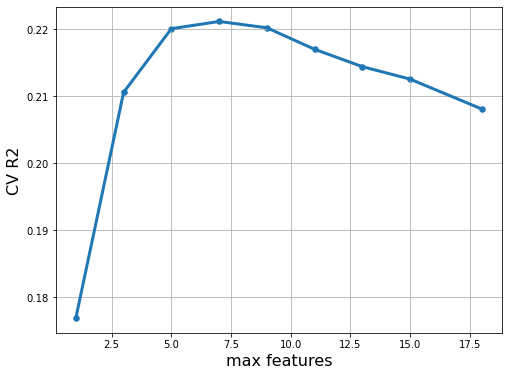

In [19]:
max_features = RF_cv.cv_results_['param_max_features'].data
R2_scores = RF_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('max features', fontsize=16)
plt.ylabel('CV R2', fontsize=16)
plt.scatter(max_features, R2_scores, s=30)
plt.plot(max_features, R2_scores, linewidth=3)
plt.grid(True, which='both')
# plt.xlim([1, 19])
# plt.ylim([0.3, 0.6])

### Random Forrest Performance

We now print the values of the optimal max_features obtained during cross validation, as well as the OSR^2 and MAE for random forests.

In [125]:
print(RF_cv.best_params_)

{'max_features': 7, 'min_samples_leaf': 5, 'n_estimators': 500, 'random_state': 10}


In [126]:
print('Best R^2 Value from Cross Validation:', round(RF_cv.best_score_, 5))

Best R^2 Value from Cross Validation: 0.22112


In [127]:
y_rf_pred = RF_cv.predict(X_rf_test)
RF_osr2 = OSR2_dtree(y_rf_pred,y_rf_test,y_rf_train)
RF_MAE = mean_absolute_error(y_rf_pred,y_rf_test,y_rf_train)

print("Random Forest Out-of-sample-R^2: ",RF_osr2)
print("Random Forest Error Out-of-sample-R^2: ",RF_MAE)

Random Forest Out-of-sample-R^2:  0.22079729780270996
Random Forest Error Out-of-sample-R^2:  0.6070478270266844


# Bootstrapping

Boosting is another technique for ensemble learning  where we combine lots of decision trees. The idea of boosting is to combine a bunch of weak models. 

Boosting procedure is generally as follows:

1. Train weak model f1 on original dataset.
2. Update overall model using learning rate and residuals.
3. Train weak model f2 on modified dataset (residuals from previous model predictions)
4. Updates overall model using learning rate and residuals.
5. Repear steps 3 and 4 till residuals are sufficiently low.

In [85]:
np.random.seed(10)
    
print(y_rf_train.shape)
print(X_rf_train.shape)
print(y_rf_test.shape)
print(X_rf_test.shape)
print()
print(y_dtr_train.shape)
print(X_dtr_train.shape)
print(y_dtr_test.shape)
print(X_dtr_test.shape)

(6272,)
(6272, 36)
(2688,)
(2688, 36)

(6272,)
(6272, 25)
(2688,)
(2688, 25)


## Bootstrapping Random Forest Model

Here is the function written for bootstrapping given test and train data, metrics required, sample size and random state.

In [128]:
def bootstrap_validation(test_data, test_label, train_label, model, metrics_list, sample=500, random_state=10):
    tic = time.time()
    # Bootstrapping
    n_sample = sample
    n_metrics = len(metrics_list)
    output_array=np.zeros([n_sample, n_metrics])
    output_array[:]=np.nan
    print(output_array.shape)
    
    for bs_iter in range(n_sample):
        bs_index = np.random.choice(test_data.index, len(test_data.index), replace=True)
        bs_data = test_data.loc[bs_index]
        bs_label = test_label.loc[bs_index]
        bs_predicted = model.predict(bs_data)
        for metrics_iter in range(n_metrics):
            metrics = metrics_list[metrics_iter]
            output_array[bs_iter, metrics_iter]=metrics(bs_predicted,bs_label,train_label)
        if bs_iter % 1000 == 0:
            print(bs_iter, time.time()-tic)

    output_df = pd.DataFrame(output_array)
    return output_df



**Run bootstrapping model on random forest model for 5000 sample size.**

In [87]:
bs_output_rf = bootstrap_validation(X_rf_test,y_rf_test,y_rf_train,RF_cv,
            ## Bootstrapping Random Forest Model

Here is the function written for bootstrapping given test and train data, metrics required, sample size and random state.                     metrics_list=[OSR2_dtree, mean_absolute_error],
                                 sample = 5000)


(5000, 2)
0 0.12359070777893066
1000 119.23523116111755
2000 238.89206194877625
3000 358.6394431591034
4000 478.71971011161804


**We now find confidence interval for the Out-Of-Sample-r2 for Random Forest model**

In [130]:
test_OSR2 = OSR2_dtree(y_rf_pred,y_rf_test,y_rf_train)
print(test_OSR2)

# The 95% confidence interval
CI_rf= np.quantile(bs_output_rf.iloc[:,0]-test_OSR2,np.array([0.025,0.975]))
print("The 95-percent confidence interval of Random Forest OSR2 is %s" % CI_rf)

0.22079729780270996
The 95-percent confidence interval of Random Forest OSR2 is [-0.02469349  0.02484497]


**CI Plot for the Out-Of-Sample-r2 for Random Forest model**

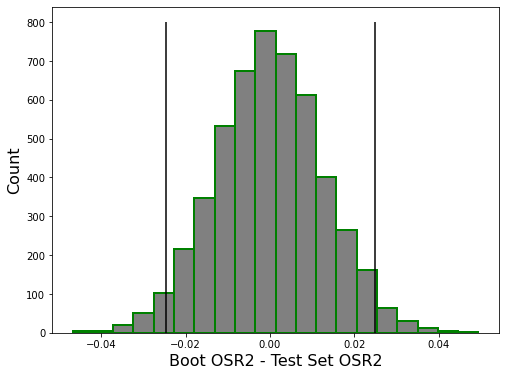

In [100]:
fig, axs = plt.subplots(ncols=1, figsize=(8,6))
axs.set_xlabel('Boot OSR2 - Test Set OSR2', fontsize=16)
axs.set_ylabel('Count', fontsize=16)
axs.hist(bs_output_rf.iloc[:,0]-test_OSR2, bins=20,edgecolor='green', linewidth=2,color = "grey")
axs.vlines(x=CI_rf[0], ymin = 0, ymax =800, color = "black")
axs.vlines(x=CI_rf[1], ymin = 0, ymax =800, color = "black")

**We now find confidence interval for the Mean Absolute Error for Random Forest model**

In [104]:
test_MAE = mean_absolute_error(y_rf_pred,y_rf_test,y_rf_train)
print(test_MAE)

# The 95% confidence interval**We now find confidence interval for the Out-Of-Sample-r2 for Random Forest model**
CI_rf= np.quantile(bs_output_rf.iloc[:,1]-test_MAE,np.array([0.025,0.975]))
print("The 95-percent confidence interval of Random Forest MAE is %s" % CI_rf)

0.6070478270266844
The 95-percent confidence interval of Random Forest MAE is [-0.01769718  0.01783056]


**CI Plot for the Mean Absolute Error for Random Forest model**

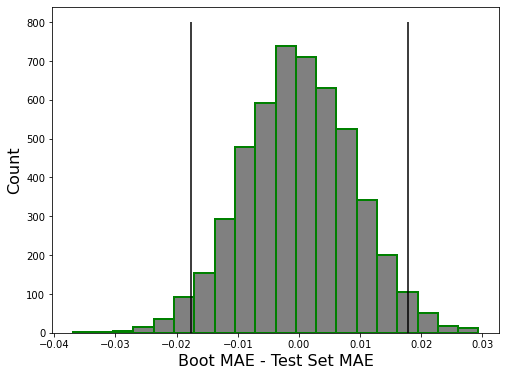

In [105]:
fig, axs = plt.subplots(ncols=1, figsize=(8,6))
axs.set_xlabel('Boot MAE - Test Set MAE', fontsize=16)
axs.set_ylabel('Count', fontsize=16)
axs.hist(bs_output_rf.iloc[:,1]-test_MAE, bins=20,edgecolor='green', linewidth=2,color = "grey")
# axs.set_xlim([-0.15,0.15])
axs.vlines(x=CI_rf[0], ymin = 0, ymax =800, color = "black")
axs.vlines(x=CI_rf[1], ymin = 0, ymax =800, color = "black")

## Bootstrapping Regression Tree Model


**Run bootstrapping model on Regression tree model for 5000 sample size.**

In [92]:
bs_output_dtr = bootstrap_validation(X_dtr_test,y_dtr_test,y_dtr_train,dtr_cv,
                                 metrics_list=[OSR2_dtree, mean_absolute_error],
                                 sample = 5000**Run bootstrapping model on random forest model for 5000 sample size.**)


(5000, 2)
0 0.003987550735473633
1000 1.9933340549468994
2000 3.973173141479492
3000 5.959526300430298
4000 7.940896272659302


**We now find confidence interval for the Out-Of-Sample-r2 for Regression Tree model**

In [103]:
test_OSR2 = OSR2_dtree(y_dtr_pred,y_dtr_test,y_dtr_train)
print(test_OSR2)

# The 95% confidence interval
CI_dtr= np.quantile(bs_output_dtr.iloc[:,0]-test_OSR2,np.array([0.025,0.975]))
print("The 95-percent confidence interval of Decision Tree OSR2 is %s" % CI_dtr**We now find confidence interval for the Out-Of-Sample-r2 for Random Forest model**)

0.19042343212080692
The 95-percent confidence interval of Decision Tree OSR2 is [-0.02963537  0.02912209]


**CI Plot for the Out-Of-Sample-r2 for Regression Tree model**

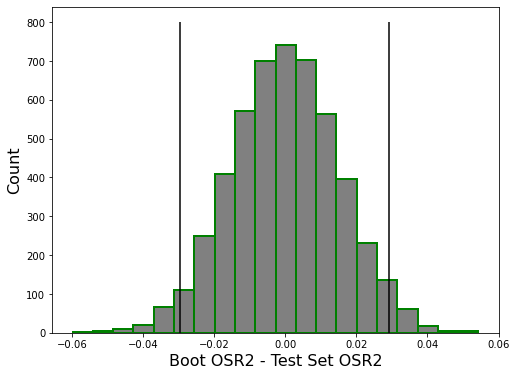

In [94]:
fig, axs = plt.subplots(ncols=1, figsize=(8,6))
axs.set_xlabel('Boot OSR2 - Test Set OSR2', fontsize=16)
axs.set_ylabel('Count', fontsize=16)
axs.hist(bs_output_dtr.iloc[:,0]-test_OSR2, bins=20,edgecolor='green', linewidth=2,color = "grey")
# axs.set_xli**CI Plot for the Out-Of-Sample-r2 for Random Forest model**m([-0.15,0.15])
axs.vlines(x=CI_dtr[0], ymin = 0, ymax =800, color = "black")
axs.vlines(x=CI_dtr[1], ymin = 0, ymax =800, color = "black")

**We now find confidence interval for the Mean Absolute Error for Regression Tree model**

In [106]:
test_MAE = mean_absolute_error(y_dtr_pred,y_dtr_test,y_dtr_train)
print(test_MAE)**We now find confidence interval for the Mean Absolute Error for Random Forest model**

# The 95% confidence interval
CI_dtr= np.quantile(bs_output_dtr.iloc[:,1]-test_MAE,np.array([0.025,0.975]))
print("The 95-percent confidence interval of Decision Tree MAE is %s" % CI_dtr)

0.6201992709855447
The 95-percent confidence interval of Decision Tree MAE is [-0.01733874  0.01774791]


**CI Plot for the Mean Absolute Error for Regression Tree model**

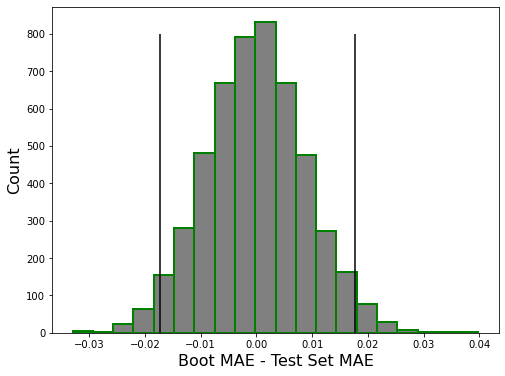

In [107]:
fig, axs = plt.subplots(ncols=1, figsize=(8,6))
axs.set_xlabel('Boot MAE - Test Set MAE', fontsize=16)
axs.set_ylabel('Count', fontsize=16)
axs.hist(bs_output_dtr.iloc[:,1]-test_MAE, bins=20,edgecolor='green', linewidth=2,color = "grey")
# axs.set_xlim([-0.15,0.15])
axs.vlines(x=CI_dtr[0], ymin = 0, ymax =800, color = "black")
axs.vlines(x=CI_dtr**CI Plot for the Mean Absolute Error for Random Forest model**[1], ymin = 0, ymax =800, color = "black")

---

### Q3) 1) (d)

**We can be confident that there is a difference in performance in the 2 methods, since the OSR2 and MAE intervals for random forest and regression tree are different**

The 95-percent confidence interval of Random Forest OSR2 is [-0.02469349  0.02484497]

The 95-percent confidence interval of Random Forest MAE is [-0.01769718  0.01783056]

The 95-percent confidence interval of Regression Tree OSR2 is [-0.02963537  0.02912209]

The 95-percent confidence interval of Regression Tree MAE is [-0.01733874  0.01774791]

**Random forest have a smaller OSR2 interval and a larger MAE interval than regression trees**

**A narrow or small confidence interval indicates that if we were to ask the same question of a different sample, we are reasonably sure we would get a similar result, hence it is more desirable and results in better performance.

---